In [ ]:
!pip install yfinance

# Train Model Using LSTM

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# Step 1: Data Collection
from datetime import datetime
stock_symbol = "AAPL"  # You can change this to any stock
start_date = "2016-03-20"
end_date = datetime.now()


In [ ]:
# Fetch data from Yahoo Finance
data = yf.download(stock_symbol, start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-03-21,24.091089,24.486882,23.915938,24.095638,142010800
2016-03-22,24.275339,24.404996,23.931863,23.940962,129777600
2016-03-23,24.141129,24.354949,24.088812,24.220744,102814000
2016-03-24,24.036499,24.168431,23.859075,23.991006,104532000
2016-03-28,23.927315,24.154782,23.897743,24.111563,77645600
...,...,...,...,...,...
2025-03-19,215.240005,218.759995,213.750000,214.220001,54385400
2025-03-20,214.100006,217.490005,212.220001,213.990005,48862900


In [ ]:
# Step 2: LSTM Model for Deep Learning-based Prediction
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data[['Close']])

X_train, y_train = [], []
for i in range(60, len(data_scaled)):
    X_train.append(data_scaled[i-60:i, 0])
    y_train.append(data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Building LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - loss: 0.0263
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0027
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0020
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0020
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0022
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0018
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0019
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 0.0017
Epoch 9/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0016
Epoch 10/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0018
Epoch 11/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0015
Epoch 12/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0014
Epoch 13/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0015
Epoch 14/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0015
Epoch 15/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0015
Epo

In [ ]:
# Predicting Future Stock Prices
predicted_stock_price = model.predict(X_train)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


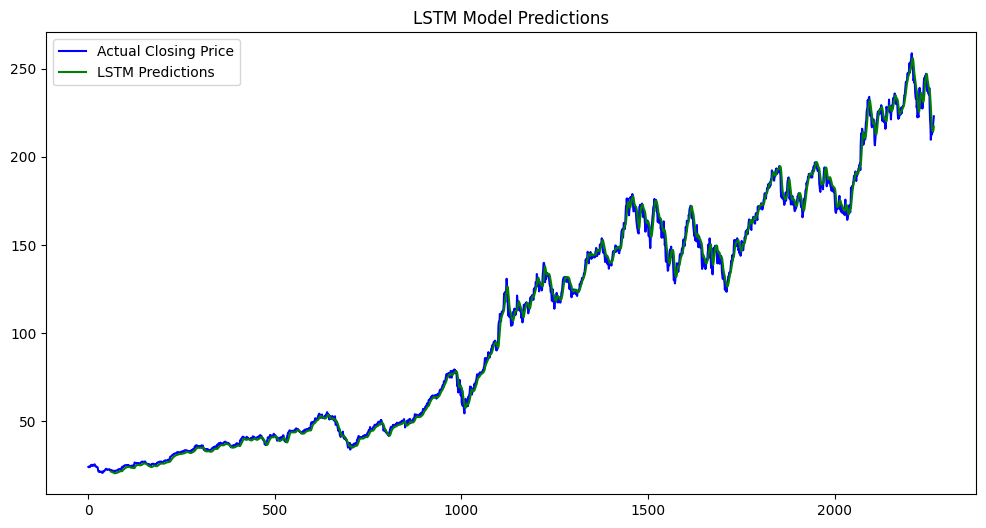

In [ ]:
# Plotting LSTM Predictions
plt.figure(figsize=(12, 6))
plt.plot(data['Close'].values, label='Actual Closing Price', color='blue')
plt.plot(range(60, len(predicted_stock_price)+60), predicted_stock_price, label='LSTM Predictions', color='green')
plt.title('LSTM Model Predictions')
plt.legend()
plt.show()

In [ ]:
# Adding Original and Predicted Prices to DataFrame
data['LSTM_Predictions'] = np.nan
data.iloc[60:, data.columns.get_loc('LSTM_Predictions')] = predicted_stock_price.flatten()


In [ ]:
data # for 48 epoch

Price,Close,High,Low,Open,Volume,LSTM_Predictions
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2016-03-21,24.091089,24.486882,23.915938,24.095638,142010800,NaN
2016-03-22,24.275339,24.404996,23.931863,23.940962,129777600,NaN
2016-03-23,24.141129,24.354949,24.088812,24.220744,102814000,NaN
2016-03-24,24.036499,24.168431,23.859075,23.991006,104532000,NaN
2016-03-28,23.927315,24.154782,23.897743,24.111563,77645600,NaN
...,...,...,...,...,...,...
2025-03-19,215.240005,218.759995,213.750000,214.220001,54385400,215.118423
2025-03-20,214.100006,217.490005,212.220001,213.990005,48862900,214.549210


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Compute R2 Score, RMSE, MAPE
actual_prices = data['Close'].values[60:]
r2 = r2_score(actual_prices, predicted_stock_price)
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_stock_price))
# mape = np.mean(np.abs((actual_prices - predicted_stock_price.flatten()) / actual_prices)) * 100

print(f'R2 Score: {r2}')
print(f'RMSE: {rmse}')
# print(f'MAPE: {mape}%')



R2 Score: 0.9974080981024999
RMSE: 3.3778542168648875


In [ ]:
# Save the trained model

import joblib
joblib.dump(model, "stock_model.pkl")

['stock_model.pkl']

In [ ]:
# Save the trained model
model.save("lstm_stock_model.keras")
print("Model saved successfully!")


Model saved successfully!
